# Using Conditional probability to determine the effect of processing on fracture
- A student performs fracture measurements for 100 different oxide ceramics samples. Of the 100 samples, 50 were annealed at high temperatures for 1 hour, 65 samples fractured and 55 of the annealed samples fractured.

Explanation:
- Event A (Condition): The ceramic was annealed at high temperatures for 1 hour period (this is the "given" information).
- Event F: The ceramic fractures under a specific load.
- Let's create a Venn diagram illustrating the data

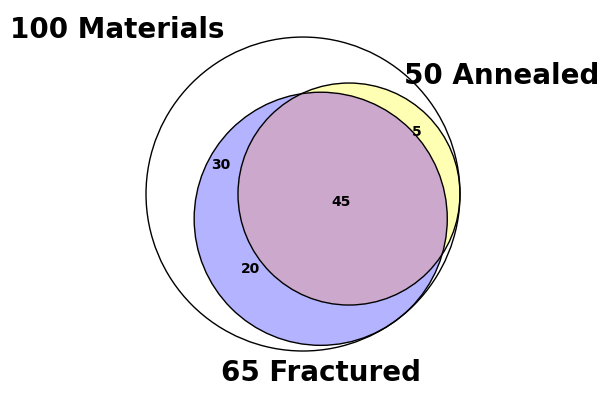

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

# Create 3 sets for materials with different properties
set_materials = {i for i in range(100)}     # 100 materials
set_annealed  = {i for i in range(50)}       # 50 annealed materials
set_fractured = {i for i in range (5, 70)}  # 65 fractured materials
# The number of annealed materials that show fracture is 45

#Change the label color to match the circle color
venn = venn3([set_materials, set_annealed, set_fractured], ('100 Materials', '50 Annealed', '65 Fractured'), 
       set_colors=('white', 'orange', 'blue'), alpha=1)
for text in venn.set_labels: text.set_fontsize(20)

venn3_circles([set_materials, set_annealed, set_fractured], linewidth=1, color='k')

plt.show()

> ### Assignment 
> - Question 1: What is the probability that a ceramic fractured, given that it was annealed?

In [2]:
# What percentage of ceramics fractured, given that they were annealed?


> ### Assignment
> - Question 2: What fraction of ceramic samples fractured, given that they were not annealed?

In [3]:
# What percentage of ceramics fractured, given that they were NOT annealed?


In this exercise, we calculated the probabilities for how different processing affects the properties of materials. The annealed samples were more likely to fracture than the non-annealed ones.

# Using Bayes' Theorem for Rare Event Detection in Materials Science

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ab/Levitation_of_a_magnet_on_a_superconductor.jpg" alt="Superconductor image from Wikipedia" align="right" style="width: 200px;float: right;"/>

## Scenario: Predicting Superconducting Materials
We are developing a machine learning model to predict whether a given material will be a superconductor based on its features (e.g., composition, structure, and electronic properties). Superconductors are rare, and only a small fraction of materials exhibit this property.

### Definitions
- **Positive prediction (E)**: The model predicts a material is a superconductor.
- **Actual positive (H)**: The material is indeed a superconductor.
- **Prior probability (P(H))**: The fraction of all materials that are superconductors, e.g., around 2%.
- **False positive rate (FPR)**: Probability that a non-superconductor is predicted as a superconductor.
- **True positive rate (TPR)**: Probability that a superconductor is correctly identified.


> ### Assignment
> Calculate the model's **precision** (accuracy of positive predictions) using Bayes' Theorem, given:
> - $P(H) = 0.02$ (rare event).
> - $P(\neg H) = 1 - P(H) = 0.998$.
> - Model's **True Positive Rate** ($P(E|H)$) = 0.9 (90% recall).
> - Model's **False Positive Rate** ($P(E|\neg H)$) = 0.2 (20% false positive rate).

In [4]:
# Parameters
P_H = 0.02         # Probability of a material being a superconductor
P_not_H = 1 - P_H  # Probability of a material NOT being a superconductor
TPR = 0.9  # True positive rate (recall)
FPR = 0.2  # False positive rate



### Analysis

### Insights
1. **Precision is crucial for rare event detection**: High recall ensures most superconductors are identified, but low precision means the predicted superconductors mostly include non-superconductors.
2. **Improving the model**:
   - Use more features or better descriptors to reduce false positives.
   - Increase the threshold for positive classification.
   - Incorporate prior knowledge (e.g., physics-based constraints) to refine predictions.
